In [1]:
print ("hello")

hello


<Axes: xlabel='Date'>

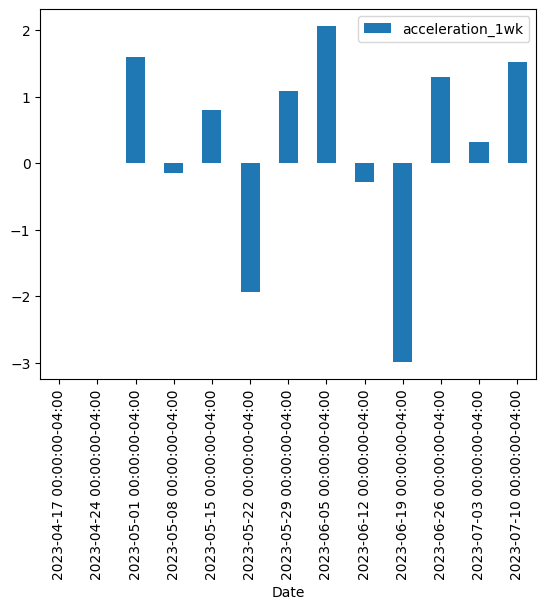

In [44]:
import yfinance as yf
import matplotlib.pyplot as plt


msft = yf.Ticker("KWEB")

msft.info

hist = msft.history(period="3mo")

close_price = hist.loc[:,"Close"]

close_price_weekly = close_price.resample('7D')

agg_df = close_price_weekly.agg(['min','mean','max', 'std'])

agg_df['velocity_1wk'] = (agg_df['mean'] - agg_df['mean'].shift(1))
agg_df['velocity_4wk'] = (agg_df['mean'] - agg_df['mean'].shift(4))


agg_df['acceleration_1wk'] = (agg_df['velocity_1wk'] - agg_df['velocity_1wk'].shift(1))
agg_df['acceleration_4wk'] = (agg_df['velocity_4wk'] - agg_df['velocity_4wk'].shift(1))

agg_df.plot( kind="bar", y="acceleration_1wk")

<Axes: xlabel='Date'>

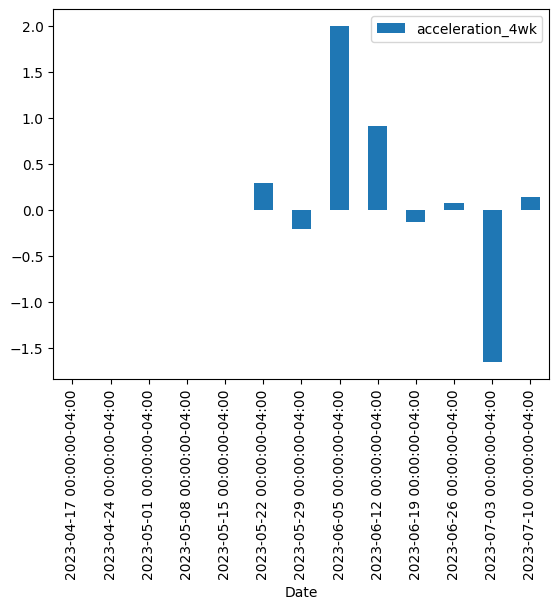

In [45]:

agg_df.plot( kind="bar", y="acceleration_4wk")

In [46]:
agg_df.sum()


min                 347.639999
mean                357.641999
max                 366.609997
std                   8.055850
velocity_1wk         -0.374000
velocity_4wk         -0.408001
acceleration_1wk      3.301500
acceleration_4wk      1.444000
dtype: float64